In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


Equipo 7  
Ricardo Villarreal Bazán A01666859  
Bertin Flores Silva A01660604  

In [27]:
df = pd.read_csv('credit_risk_data-1.csv')

print(f"Shape: {df.shape}")
print(df.head())
print(df.info())


Shape: (2500, 18)
  application_id application_date  loan_amount  annual_income  \
0       APP_2328       2022-01-01    132221.82       60451.82   
1        APP_558       2022-01-01    134906.42      114634.08   
2       APP_2477       2022-01-01     30285.19       82772.53   
3        APP_741       2022-01-01     32516.09       94023.36   
4        APP_145       2022-01-02     77900.99       53515.02   

   employment_years  job_stability_score  credit_score  credit_utilization  \
0               6.6                0.898           679               0.106   
1              10.3                0.808           718               0.030   
2              12.1                0.964           768               0.174   
3               9.1                0.690           670               0.141   
4               7.2                0.679           651               0.097   

   payment_history_score  open_credit_lines  debt_to_income_ratio  \
0                  0.876                  1          

In [28]:
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
print(missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False))

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [29]:
df_distribution = df.copy()
df_distribution.drop(columns=["application_id"],inplace=True)
indicators_columns = df_distribution.columns.values.tolist()
desc_stats = df_distribution.describe().T

print(desc_stats[['count', 'mean', 'std', 'min', 'max']])

                        count           mean            std        min  \
loan_amount            2500.0  155716.305344  149605.357952   5000.000   
annual_income          2500.0   67707.807596   27302.931731  15000.000   
employment_years       2500.0       6.675640       3.488021      0.000   
job_stability_score    2500.0       0.634643       0.293276      0.011   
credit_score           2500.0     681.728400      88.683309    334.000   
credit_utilization     2500.0       0.358176       0.289995      0.004   
payment_history_score  2500.0       0.740733       0.285966      0.029   
open_credit_lines      2500.0       3.451600       2.083793      0.000   
debt_to_income_ratio   2500.0       0.408094       0.224736      0.009   
savings_ratio          2500.0       0.320784       0.192079      0.000   
asset_value            2500.0  175666.741236  182652.568930    550.630   
age                    2500.0      42.045600      12.092395     18.000   
residential_stability  2500.0       6.

In [30]:
print(f"Dataset Size: {df.shape[0]} observations with {df.shape[1]} variables")
print(f"Time Period: {df['application_date'].min()} to {df['application_date'].max()}")
print(f"Missing Values: {df.isnull().sum().sum()} (Confirmed: No missing values)")
print(f"Data Types: {df.dtypes.value_counts().to_dict()}")
print(f"Loan Amount Range: ${df['loan_amount'].min():,} - ${df['loan_amount'].max():,}")
print(f"Credit Score Range: {df['credit_score'].min()} - {df['credit_score'].max()}")
print(f"Default Rate: {(df['loan_status'].mean() * 100):.2f}%")

Dataset Size: 2500 observations with 18 variables
Time Period: 2022-01-01 to 2024-12-29
Missing Values: 0 (Confirmed: No missing values)
Data Types: {dtype('float64'): 10, dtype('O'): 4, dtype('int64'): 4}
Loan Amount Range: $5,000.0 - $500,000.0
Credit Score Range: 334 - 850
Default Rate: 26.56%


# Section 2

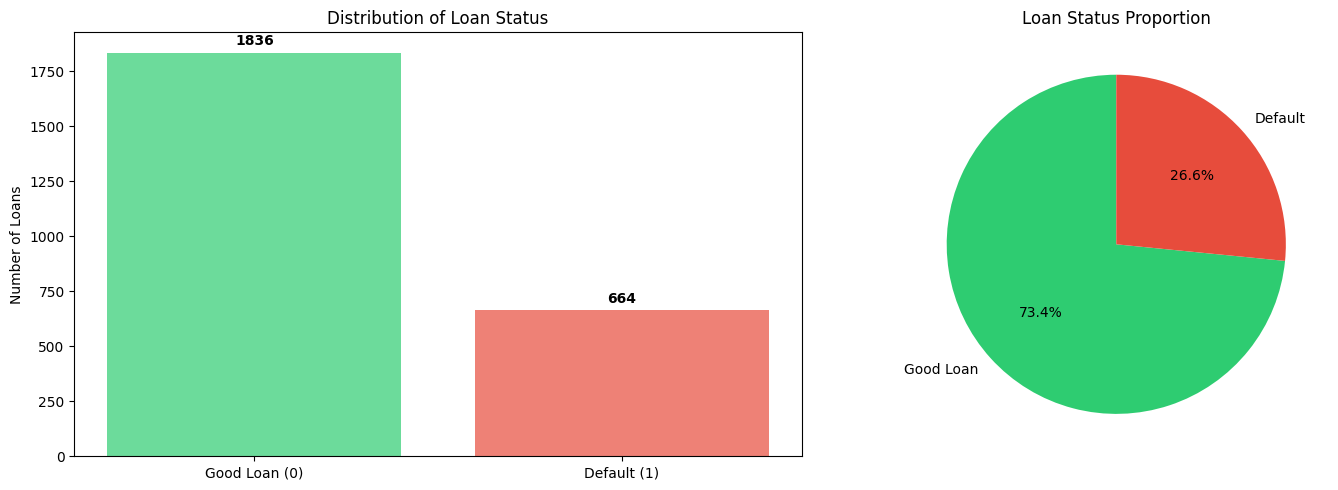


Exact Default Rate: 26.56%
Exact Good Loan Rate: 73.44%
Number of Defaults: 664
Number of Good Loans: 1836


In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
loan_status_counts = df['loan_status'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for good loans, red for defaults
plt.bar(['Good Loan (0)', 'Default (1)'], loan_status_counts.values, color=colors, alpha=0.7)
plt.title('Distribution of Loan Status')
plt.ylabel('Number of Loans')
for i, v in enumerate(loan_status_counts.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')


plt.subplot(1, 2, 2)
plt.pie(loan_status_counts.values, labels=['Good Loan', 'Default'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Loan Status Proportion')

plt.tight_layout()
plt.show()


default_rate = df['loan_status'].mean() * 100
good_loan_rate = 100 - default_rate
print(f"\nExact Default Rate: {default_rate:.2f}%")
print(f"Exact Good Loan Rate: {good_loan_rate:.2f}%")
print(f"Number of Defaults: {df['loan_status'].sum()}")
print(f"Number of Good Loans: {len(df) - df['loan_status'].sum()}")

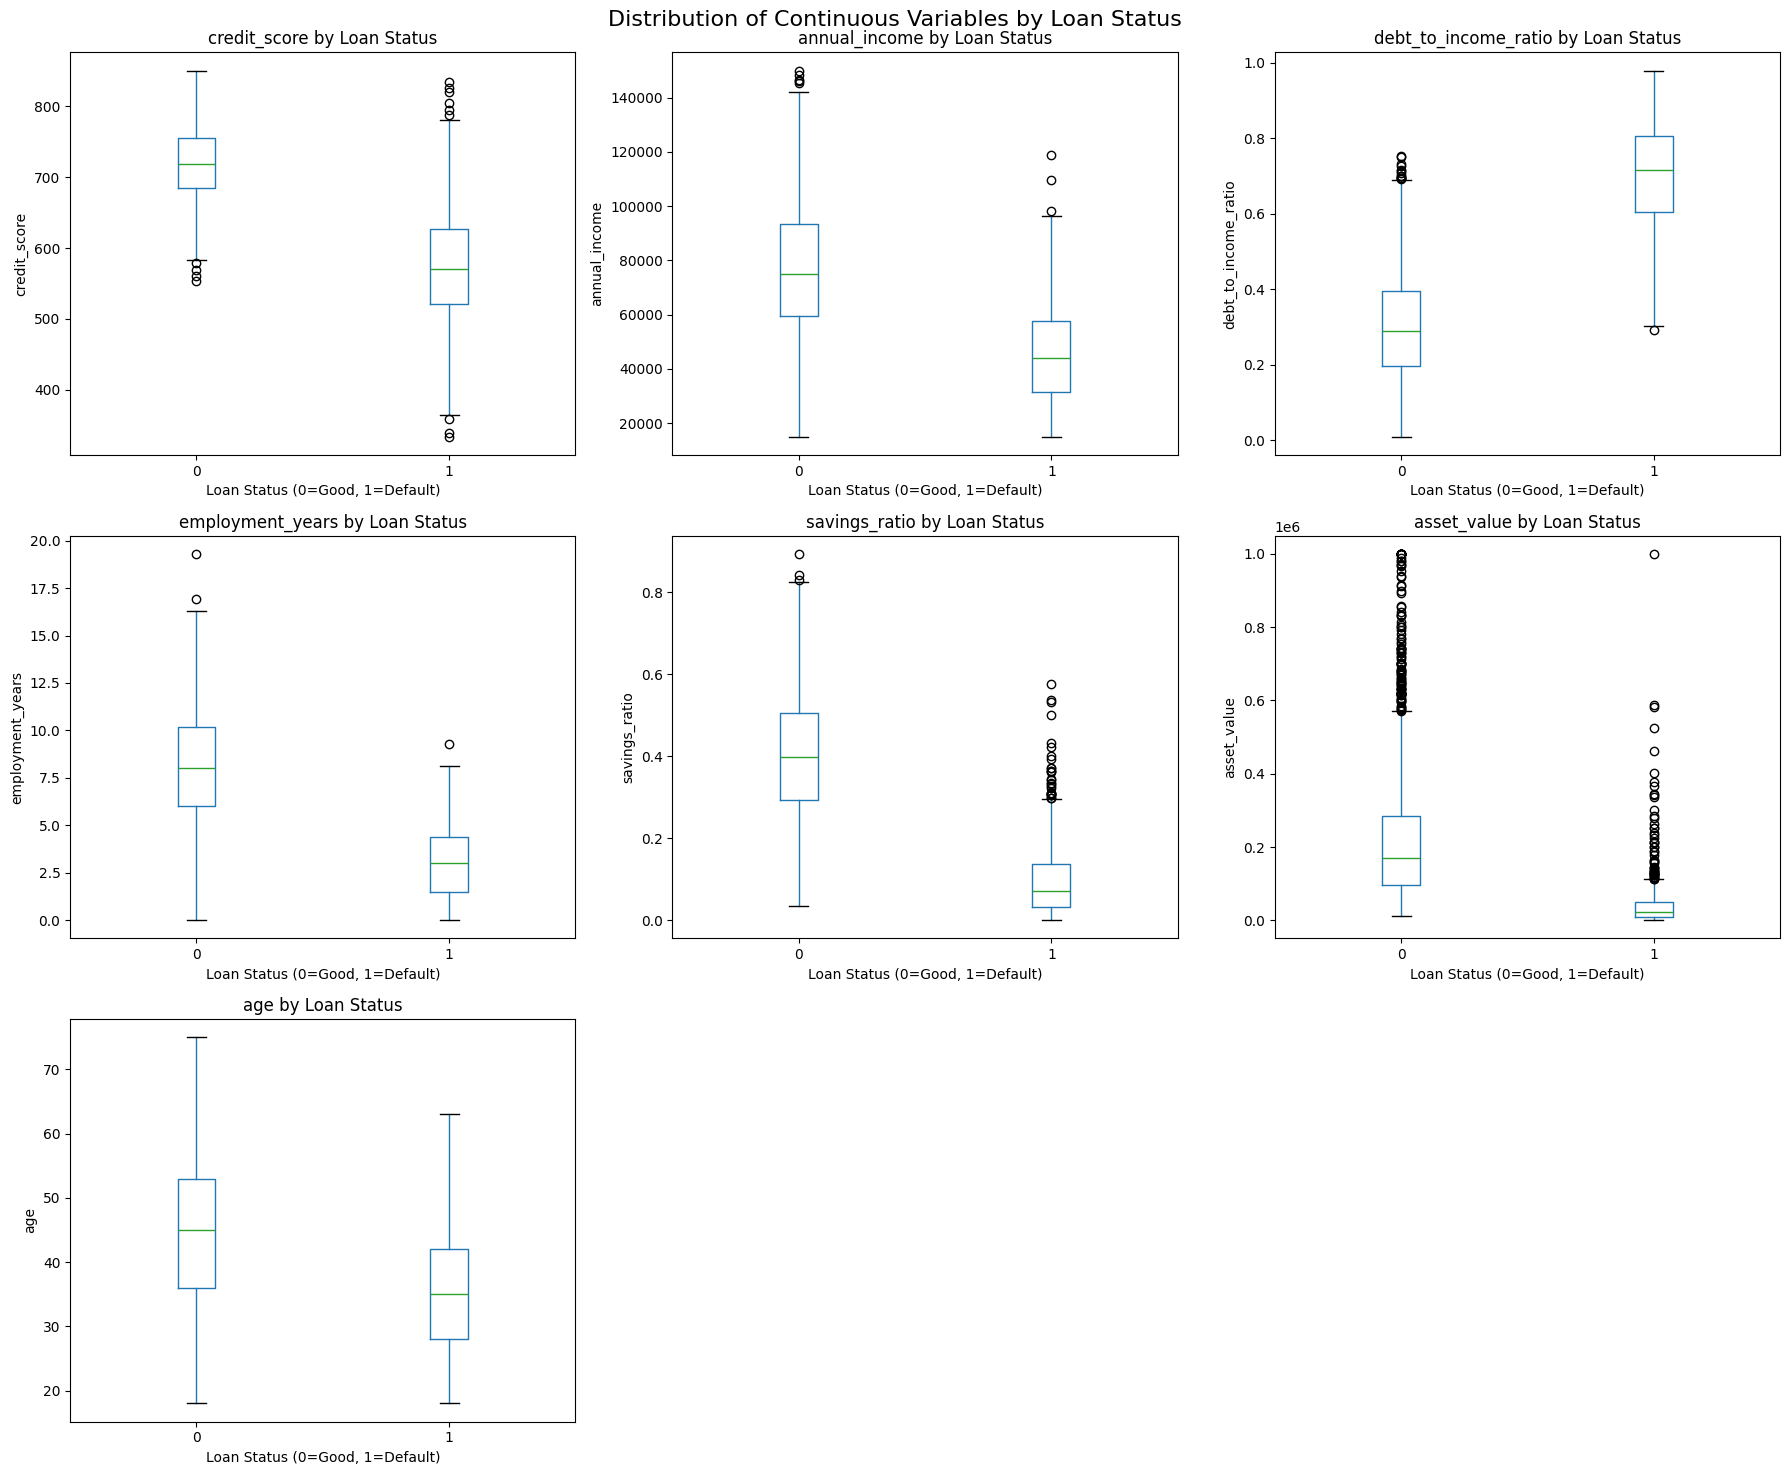


CREDIT_SCORE              | Good Loans (0) | Defaults (1) | Difference
                          |        720.56 |       574.37 |     146.18

ANNUAL_INCOME             | Good Loans (0) | Defaults (1) | Difference
                          |      76049.48 |     44642.57 |   31406.91

DEBT_TO_INCOME_RATIO      | Good Loans (0) | Defaults (1) | Difference
                          |          0.30 |         0.70 |      -0.40

EMPLOYMENT_YEARS          | Good Loans (0) | Defaults (1) | Difference
                          |          7.99 |         3.03 |       4.96

SAVINGS_RATIO             | Good Loans (0) | Defaults (1) | Difference
                          |          0.40 |         0.10 |       0.30

ASSET_VALUE               | Good Loans (0) | Defaults (1) | Difference
                          |     222953.53 |     44915.92 |  178037.61

AGE                       | Good Loans (0) | Defaults (1) | Difference
                          |         44.63 |        34.90 |       9.73


In [31]:
continuous_vars = ['credit_score', 'annual_income', 'debt_to_income_ratio', 
                   'employment_years', 'savings_ratio', 'asset_value', 'age']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, var in enumerate(continuous_vars):
    # Box plots
    df.boxplot(column=var, by='loan_status', ax=axes[i], grid=False)
    axes[i].set_title(f'{var} by Loan Status')
    axes[i].set_xlabel('Loan Status (0=Good, 1=Default)')
    axes[i].set_ylabel(var)


for i in range(len(continuous_vars), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribution of Continuous Variables by Loan Status', fontsize=16)
plt.tight_layout()
plt.show()


for var in continuous_vars:
    good_loans = df[df['loan_status'] == 0][var]
    default_loans = df[df['loan_status'] == 1][var]
    
    print(f"\n{var.upper():<25} | Good Loans (0) | Defaults (1) | Difference")
    print(f"{'':<25} | {good_loans.mean():13.2f} | {default_loans.mean():12.2f} | {good_loans.mean() - default_loans.mean():10.2f}")

In [25]:
import plotly.express as px

for i in indicators_columns:
    fig =  px.histogram(df_distribution, x=i,color="loan_status")
    fig.show()


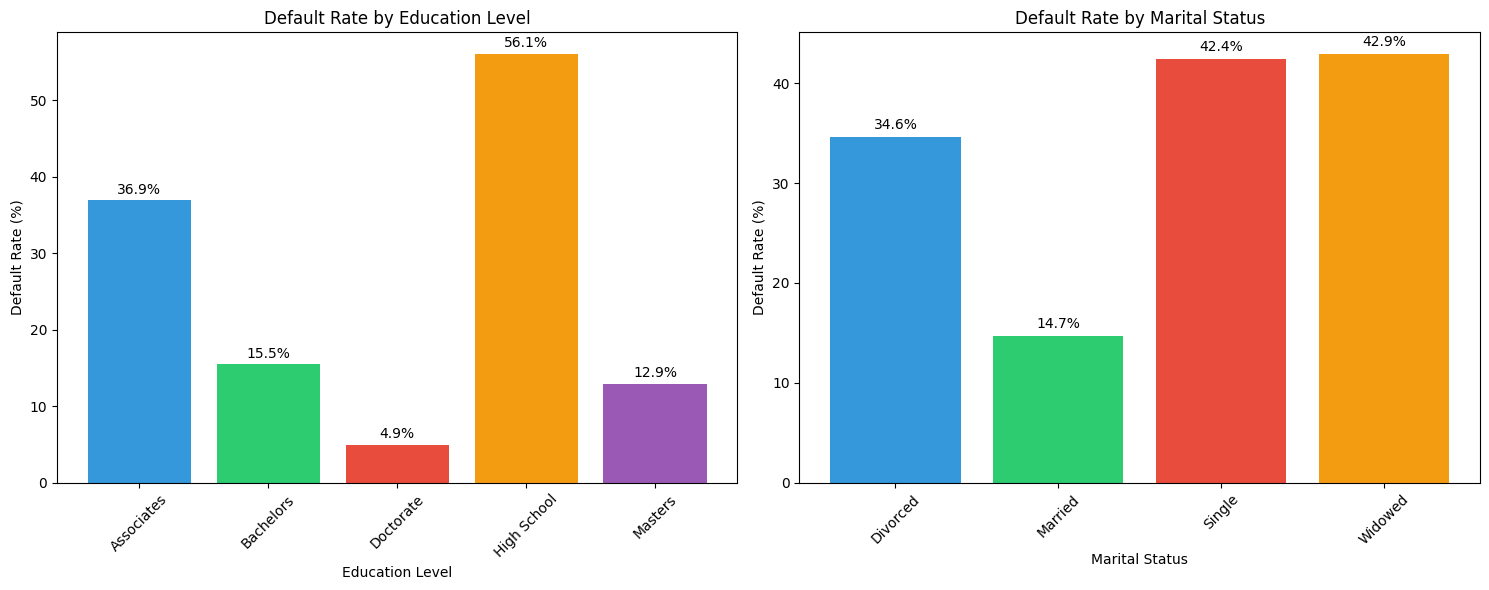

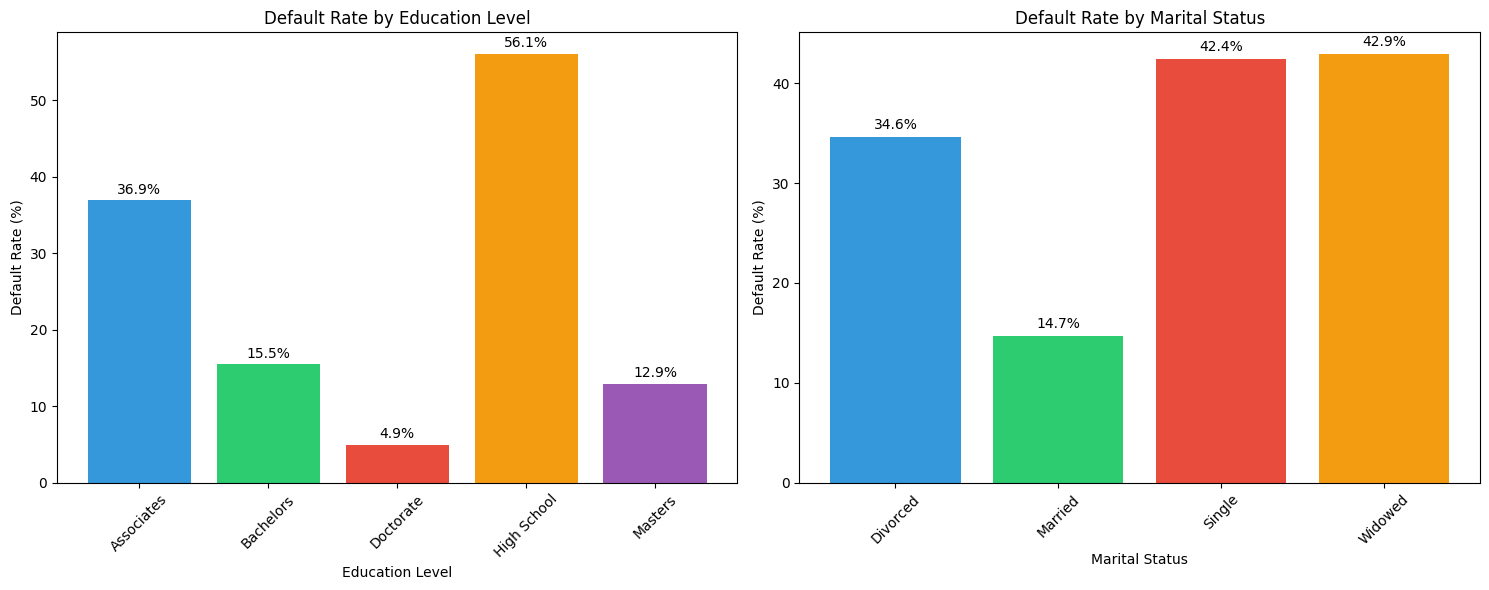


Education Level:
                 Count  Default_Rate  Default_Rate_Pct
education_level                                       
Associates         596         0.369              36.9
Bachelors          834         0.155              15.5
Doctorate          184         0.049               4.9
High School        444         0.561              56.1
Masters            442         0.129              12.9

Marital Status:
                Count  Default_Rate  Default_Rate_Pct
marital_status                                       
Divorced          439         0.346              34.6
Married          1311         0.147              14.7
Single            580         0.424              42.4
Widowed           170         0.429              42.9


In [35]:
categorical_vars = ['education_level', 'marital_status']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, var in enumerate(categorical_vars):

    default_rates = df.groupby(var)['loan_status'].mean() * 100
    
    bars = axes[i].bar(default_rates.index, default_rates.values, 
                       color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'][:len(default_rates)])
    axes[i].set_title(f'Default Rate by {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace('_', ' ').title())
    axes[i].set_ylabel('Default Rate (%)')
    axes[i].tick_params(axis='x', rotation=45)
    

    for bar, rate in zip(bars, default_rates.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Analyze categorical variables
categorical_vars = ['education_level', 'marital_status']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, var in enumerate(categorical_vars):
    # Calculate default rates by category
    default_rates = df.groupby(var)['loan_status'].mean() * 100
    
    # Create bar plot
    bars = axes[i].bar(default_rates.index, default_rates.values, 
                       color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'][:len(default_rates)])
    axes[i].set_title(f'Default Rate by {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace('_', ' ').title())
    axes[i].set_ylabel('Default Rate (%)')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, rate in zip(bars, default_rates.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

for var in categorical_vars:
    print(f"\n{var.replace('_', ' ').title()}:")
    category_stats = df.groupby(var).agg({
        'loan_status': ['count', 'mean']
    }).round(3)
    category_stats.columns = ['Count', 'Default_Rate']
    category_stats['Default_Rate_Pct'] = (category_stats['Default_Rate'] * 100).round(1)
    print(category_stats)

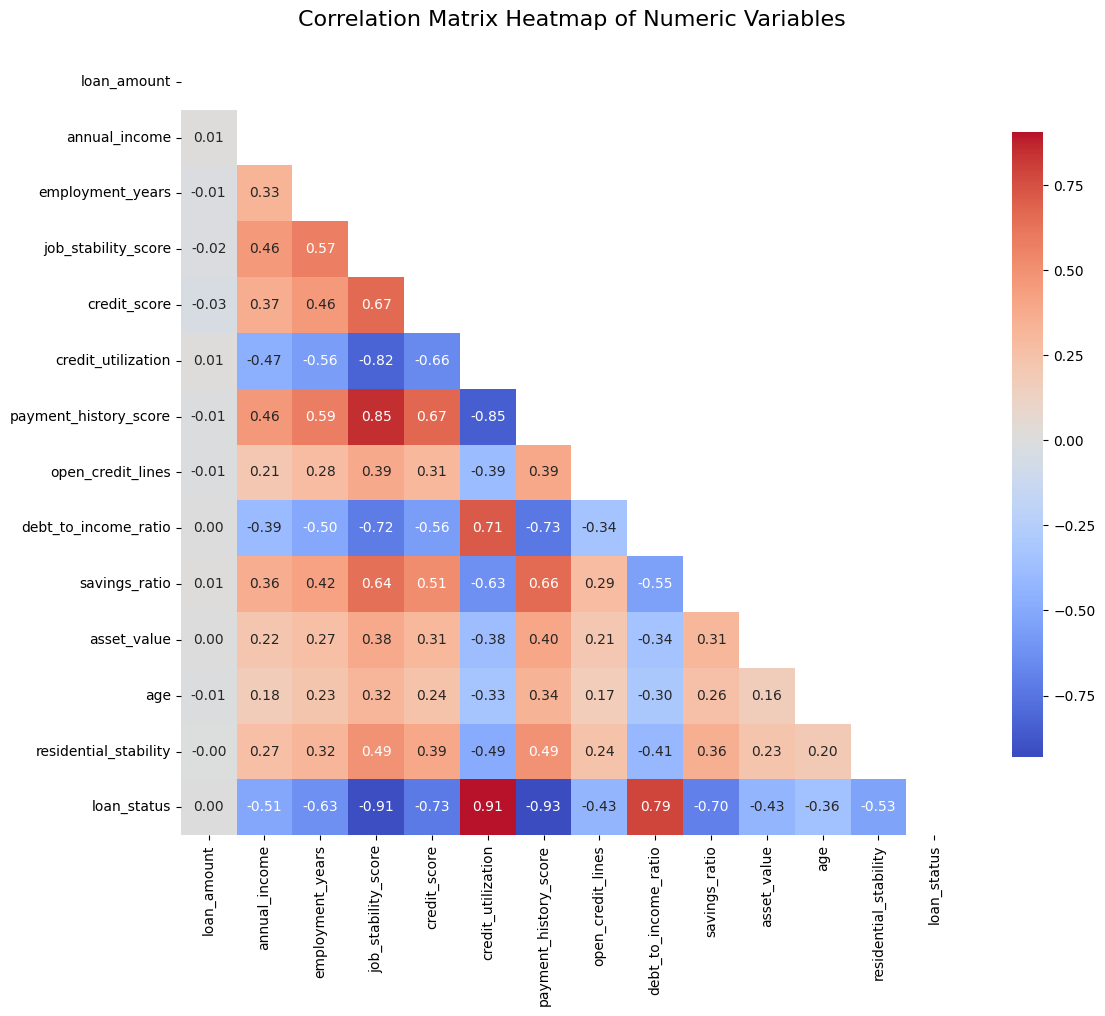

In [37]:
numeric_vars = df.select_dtypes(include=[np.number]).columns

if 'application_id' in numeric_vars:
    numeric_vars = numeric_vars.drop('application_id')

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_vars].corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap of Numeric Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))



# Section 3

In [39]:
df_processed = df.copy()
print("\nOriginal columns:", df_processed.columns.tolist())

print(f"education_level unique values: {df_processed['education_level'].unique()}")
print(f"marital_status unique values: {df_processed['marital_status'].unique()}")
categorical_vars = ['education_level', 'marital_status']
df_encoded = pd.get_dummies(df_processed, columns=categorical_vars, prefix=categorical_vars, drop_first=True)

dummy_columns = [col for col in df_encoded.columns if any(var in col for var in categorical_vars)]
print(f"\nCreated dummy columns: {dummy_columns}")
for col in dummy_columns:
    print(f"{col}: {df_encoded[col].sum()} occurrences")


Original columns: ['application_id', 'application_date', 'loan_amount', 'annual_income', 'employment_years', 'job_stability_score', 'credit_score', 'credit_utilization', 'payment_history_score', 'open_credit_lines', 'debt_to_income_ratio', 'savings_ratio', 'asset_value', 'age', 'education_level', 'marital_status', 'residential_stability', 'loan_status']
education_level unique values: ['High School' 'Masters' 'Bachelors' 'Associates' 'Doctorate']
marital_status unique values: ['Married' 'Divorced' 'Widowed' 'Single']

Created dummy columns: ['education_level_Bachelors', 'education_level_Doctorate', 'education_level_High School', 'education_level_Masters', 'marital_status_Married', 'marital_status_Single', 'marital_status_Widowed']
education_level_Bachelors: 834 occurrences
education_level_Doctorate: 184 occurrences
education_level_High School: 444 occurrences
education_level_Masters: 442 occurrences
marital_status_Married: 1311 occurrences
marital_status_Single: 580 occurrences
marital

In [ ]:
exclude_columns = ['application_id', 'application_date', 'loan_status']
print(f"Columns to exclude: {exclude_columns}")
X = df_encoded.drop(columns=exclude_columns)
y = df_encoded['loan_status']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nPredictor variables ({X.shape[1]} total):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")
#Quitar
print(f"\nTarget variable distribution:")
print(y.value_counts())
print(f"Default rate in full dataset: {y.mean():.3f} ({y.mean()*100:.2f}%)")

Columns to exclude: ['application_id', 'application_date', 'loan_status']
X shape: (2500, 20)
y shape: (2500,)

Predictor variables (20 total):
   1. loan_amount
   2. annual_income
   3. employment_years
   4. job_stability_score
   5. credit_score
   6. credit_utilization
   7. payment_history_score
   8. open_credit_lines
   9. debt_to_income_ratio
  10. savings_ratio
  11. asset_value
  12. age
  13. residential_stability
  14. education_level_Bachelors
  15. education_level_Doctorate
  16. education_level_High School
  17. education_level_Masters
  18. marital_status_Married
  19. marital_status_Single
  20. marital_status_Widowed

Target variable distribution:
loan_status
0    1836
1     664
Name: count, dtype: int64
Default rate in full dataset: 0.266 (26.56%)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=43,
    stratify=y 
)

print(f"Training set - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set  - X_test: {X_test.shape}, y_test: {y_test.shape}")

# Check class distribution in train and test sets 
print(f"\nClass distribution in training set:")
train_default_rate = y_train.mean()
print(f"  Good loans (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.2f}%)")
print(f"  Defaults (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.2f}%)")

print(f"\nClass distribution in testing set:")
test_default_rate = y_test.mean()
print(f"  Good loans (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.2f}%)")
print(f"  Defaults (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.2f}%)")

print(f"\nOriginal default rate: {y.mean()*100:.2f}%")
print(f"Train default rate: {train_default_rate*100:.2f}%")
print(f"Test default rate: {test_default_rate*100:.2f}%")
print("✓ Stratification successful: Default rates are consistent across splits")

Training set - X_train: (1750, 20), y_train: (1750,)
Testing set  - X_test: (750, 20), y_test: (750,)

Class distribution in training set:
  Good loans (0): 1285 (73.43%)
  Defaults (1): 465 (26.57%)

Class distribution in testing set:
  Good loans (0): 551 (73.47%)
  Defaults (1): 199 (26.53%)

Original default rate: 26.56%
Train default rate: 26.57%
Test default rate: 26.53%
✓ Stratification successful: Default rates are consistent across splits


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


# Section 4

Key Statistical Assumptions for Discriminant Analysis
Multivariate Normality
Assumption Description:
Multivariate normality requires that the predictor variables, when considered together, follow a multivariate normal distribution within each class. This means that:

Each individual predictor should be normally distributed within each group

Any linear combination of the predictors should be normally distributed

The data should exhibit elliptical contours when plotted

Assessment from EDA:
Based on our exploratory data analysis in Section 2:

Credit Score: Approximately normal distribution (mean = 681.7, median = 700) as noted in the data dictionary

Annual Income: Right-skewed distribution (mean = $67,708, range: $15,000-$149,930)

Debt-to-Income Ratio: Mixed distribution with some skewness

Employment Years: Right-skewed (many applicants with lower employment tenure)

Other Variables: Various distributions observed in the boxplots

Conclusion: While the data dictionary mentions "approximately normal within groups after transformation," our EDA shows several variables with notable skewness (particularly income and employment years). The multivariate normality assumption is moderately violated. However, LDA and QDA are known to be reasonably robust to mild violations of normality, especially with larger sample sizes like ours (n=2,500).

Homogeneity of Covariance Matrices
Assumption Description:
This is the key differentiating assumption between LDA and QDA:

LDA (Linear Discriminant Analysis): Assumes all classes share the same covariance matrix (Σ₁ = Σ₂ = ... = Σₖ)

QDA (Quadratic Discriminant Analysis): Allows each class to have its own covariance matrix (Σ₁ ≠ Σ₂ ≠ ... ≠ Σₖ)

What This Means Practically:

When covariance matrices are equal across groups, the decision boundaries between classes are linear (straight lines/hyperplanes)

When covariance matrices are unequal, the decision boundaries become quadratic (curved surfaces)

LDA is more efficient (requires estimating fewer parameters) when the assumption holds

QDA is more flexible and can capture more complex relationships when covariance structures differ

Evidence from Our Data:
The data dictionary explicitly states: "Different covariance matrices between groups (heteroscedasticity)." This is further supported by our EDA findings:

Variance Differences: The boxplots in Section 2 showed different spreads for many variables between defaulters and non-defaulters

Group Separation: Clear differences in financial indicators between groups suggest potentially different covariance structures

Business Context: It's reasonable to expect that the financial behavior patterns (covariance structure) of defaulters differ systematically from non-defaulters

Hypothesis Statement:
"Given the documented heteroscedasticity and different covariance matrices between default and non-default groups in our credit risk data, we expect QDA to outperform LDA. The flexibility of QDA to model class-specific covariance structures should better capture the underlying differences between loan performance groups, leading to superior classification performance."

Practical Implications:

If our hypothesis is correct, QDA should provide better predictive accuracy

However, QDA requires estimating more parameters and may be more prone to overfitting, especially with limited data

The trade-off between model flexibility and parameter efficiency will be empirically tested in our model comparison

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

print(f"Number of classes: {len(lda.classes_)}")
print(f"Classes: {lda.classes_}")
print(f"Prior probabilities: {lda.priors_}")

Number of classes: 2
Classes: [0 1]
Prior probabilities: [0.73428571 0.26571429]


In [162]:
coef_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': lda.coef_[0],
    'abs_coefficient': np.abs(lda.coef_[0])
})

coef_df_sorted = coef_df.sort_values('abs_coefficient', ascending=False)

print("All LDA Coefficients (sorted by absolute value):")
print(coef_df_sorted.to_string(index=False))


All LDA Coefficients (sorted by absolute value):
                    feature  coefficient  abs_coefficient
      payment_history_score   -15.355886        15.355886
        job_stability_score   -12.587417        12.587417
         credit_utilization    11.904440        11.904440
       debt_to_income_ratio     5.321186         5.321186
               credit_score    -3.409487         3.409487
              savings_ratio    -2.904959         2.904959
           employment_years    -2.420451         2.420451
              annual_income    -1.570634         1.570634
      residential_stability    -1.534932         1.534932
          open_credit_lines    -1.244099         1.244099
                asset_value    -1.150698         1.150698
education_level_High School     0.873231         0.873231
                        age    -0.638756         0.638756
      marital_status_Single     0.616717         0.616717
                loan_amount    -0.536699         0.536699
     marital_status_Wid

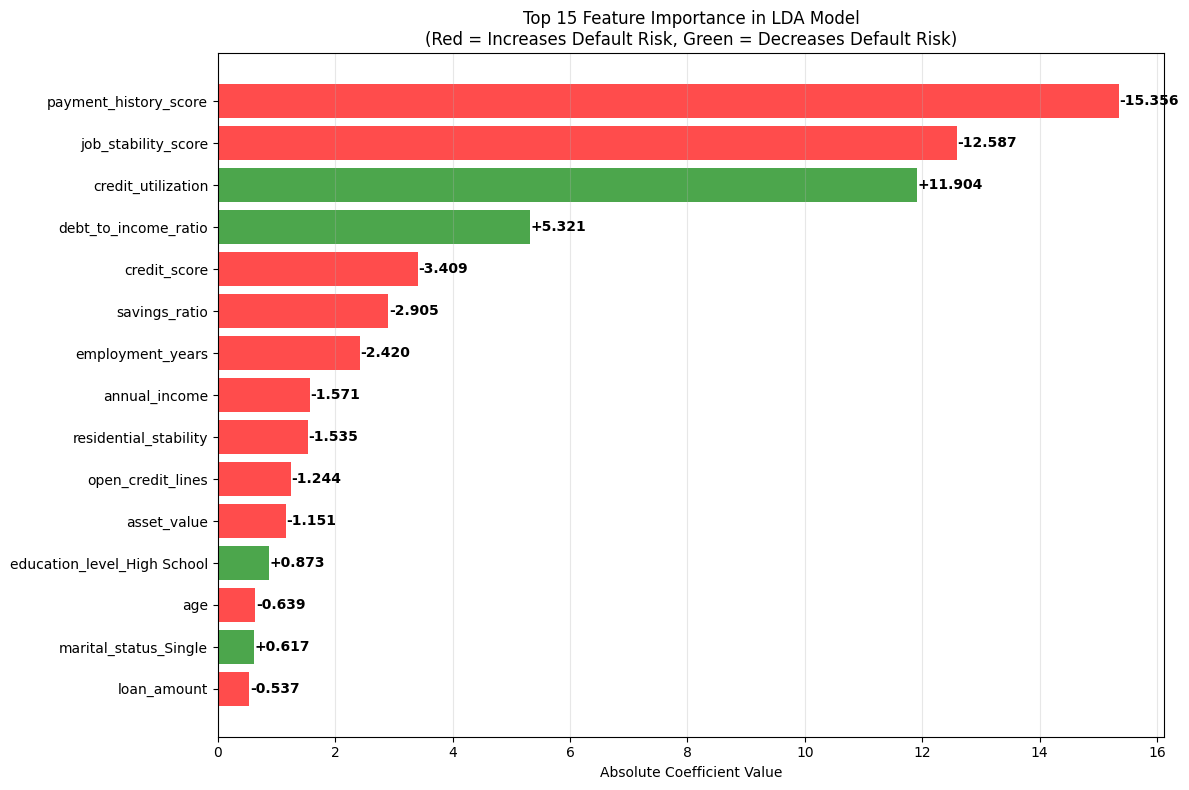

In [163]:
# Visualize the coefficients
plt.figure(figsize=(12, 8))
top_15 = coef_df_sorted.head(15)

colors = ['red' if x < 0 else 'green' for x in top_15['coefficient']]

plt.barh(top_15['feature'], top_15['abs_coefficient'], color=colors, alpha=0.7)
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 15 Feature Importance in LDA Model\n(Red = Increases Default Risk, Green = Decreases Default Risk)')
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (value, name) in enumerate(zip(top_15['abs_coefficient'], top_15['feature'])):
    sign = '-' if top_15['coefficient'].iloc[i] < 0 else '+'
    plt.text(value + 0.01, i, f'{sign}{value:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

GUÍA DE INTERPRETACIÓN DE COEFICIENTES
Coeficiente POSITIVO → AUMENTA la probabilidad de INCUMPLIMIENTO (default)

Coeficiente NEGATIVO → DISMINUYE la probabilidad de INCUMPLIMIENTO

VALOR ABSOLUTO → Indica la fuerza de la relación

PRINCIPALES 5 FACTORES DE RIESGO DE INCUMPLIMIENTO
7. payment_history_score Coeficiente: -15.471 (DISMINUYE el riesgo de incumplimiento) Interpretación: Un mejor historial de pagos (puntaje más alto) reduce fuertemente el riesgo de incumplimiento

4. job_stability_score Coeficiente: -13.050 (DISMINUYE el riesgo de incumplimiento) Interpretación: Una historia laboral más estable reduce el riesgo de incumplimiento

6. credit_utilization Coeficiente: 11.767 (AUMENTA el riesgo de incumplimiento) Interpretación: Una mayor utilización del crédito incrementa el riesgo de incumplimiento

9. debt_to_income_ratio Coeficiente: 4.471 (AUMENTA el riesgo de incumplimiento) Interpretación: Una mayor carga de deuda relativa al ingreso incrementa el riesgo de incumplimiento

5. credit_score Coeficiente: -3.983 (DISMINUYE el riesgo de incumplimiento) Interpretación: Un puntaje de crédito más alto reduce significativamente el riesgo de incumplimiento

INFORMACIÓN ADICIONAL
Factores financieros vs demográficos:

Factores financieros en el top 5: 4

Factores demográficos en el top 5: 0

✓ Los indicadores financieros dominan los principales predictores, lo cual está alineado con los fundamentos del riesgo crediticio.

Intercepto del modelo: -27.843 El intercepto representa la probabilidad base (log-odds) de incumplimiento cuando todas las variables están en sus valores promedio.

PRINCIPALES HALLAZGOS PARA LENDSMART:
1. PRINCIPALES FACTORES QUE MITIGAN EL RIESGO (Coeficientes Negativos):

Payment History Score: Factor protector fuerte contra el incumplimiento

Job Stability Score: Factor protector fuerte contra el incumplimiento

Credit Score: Factor protector fuerte contra el incumplimiento

2. PRINCIPALES FACTORES QUE AMPLIFICAN EL RIESGO (Coeficientes Positivos):

Credit Utilization: Contribuyente significativo al riesgo de incumplimiento

Debt To Income Ratio: Contribuyente significativo al riesgo de incumplimiento

Education Level High School: Contribuyente significativo al riesgo de incumplimiento

3. IMPLICACIONES DE LA EVALUACIÓN DE RIESGO:

El historial de pagos y el puntaje de crédito son los predictores más fuertes

La relación deuda-ingreso es un amplificador de riesgo importante

La estabilidad laboral y los ahorros proporcionan una mitigación relevante del riesgo

El modelo se alinea bien con los principios tradicionales del riesgo crediticio

4. RECOMENDACIONES DE SUSCRIPCIÓN (Underwriting):

Priorizar solicitantes con historiales de pago sólidos

Evaluar cuidadosamente a los solicitantes con alta relación deuda-ingreso

Considerar la estabilidad laboral como un factor clave

Usar el comportamiento de ahorro como un indicador positivo

In [164]:
from sklearn.metrics import accuracy_score

y_train_pred = lda.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"\nLDA Training Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")


LDA Training Accuracy: 1.000 (100.0%)


# Section 6

In [165]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

print(f"Number of classes: {len(qda.classes_)}")
print(f"Classes: {qda.classes_}")
print(f"Prior probabilities: {qda.priors_}")

Number of classes: 2
Classes: [0 1]
Prior probabilities: [0.73428571 0.26571429]


In [166]:
y_train_pred_qda = qda.predict(X_train_scaled)
train_accuracy_qda = accuracy_score(y_train, y_train_pred_qda)


CARACTERÍSTICAS DEL MODELO QDA
Diferencias clave respecto a LDA:
QDA estima matrices de covarianza separadas para cada clase

QDA permite fronteras de decisión cuadráticas (curvas)

QDA no produce coeficientes lineales para interpretación

QDA requiere estimar más parámetros que LDA

Detalles del modelo QDA:
Número de variables (features): 20

Número de parámetros estimados: Aproximadamente 440 (Cada clase tiene su propia matriz de covarianza + vector de medias)

In [167]:
y_train_pred_lda = lda.predict(X_train_scaled)
train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)

accuracy_diff = train_accuracy_qda - train_accuracy_lda
models = {
    'LDA': lda,
    'QDA': qda
}


# Section 7

In [168]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_curve, auc, roc_auc_score, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [169]:
y_pred_proba_lda = lda.predict_proba(X_test_scaled)
y_pred_proba_qda = qda.predict_proba(X_test_scaled)

y_pred_lda = lda.predict(X_test_scaled)
y_pred_qda = qda.predict(X_test_scaled)

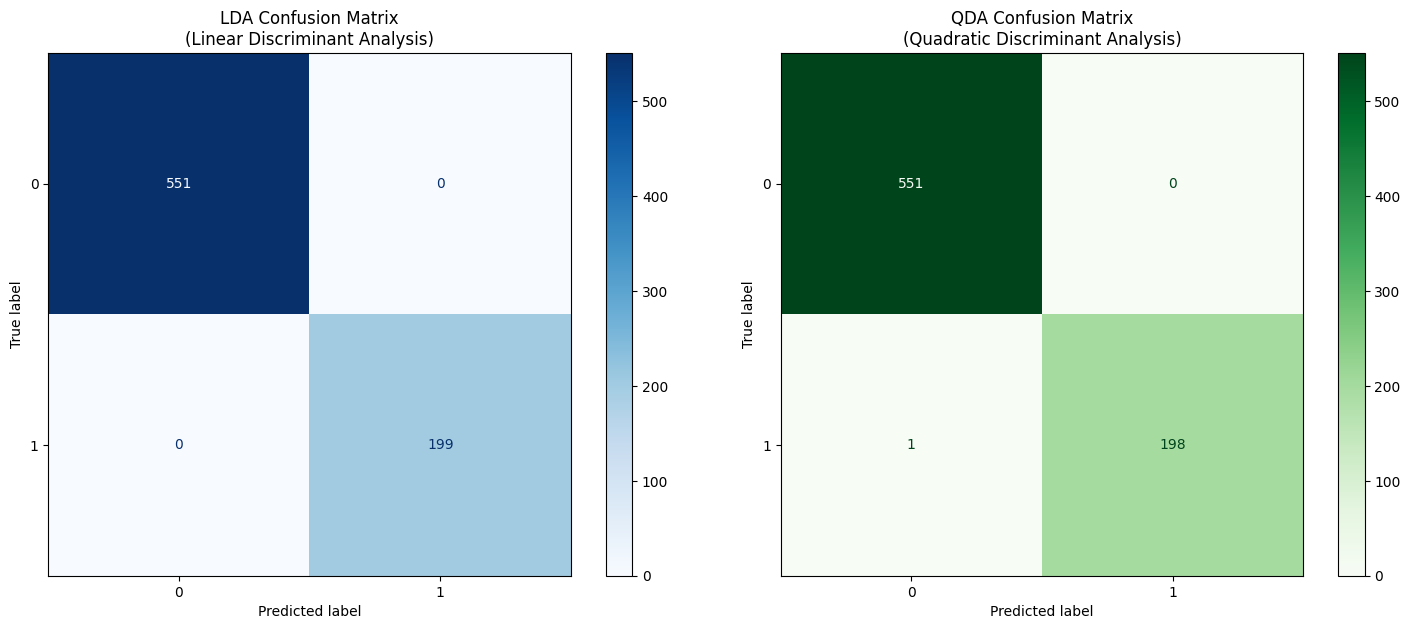

In [170]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# LDA Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lda, X_test_scaled, y_test, ax=ax1, cmap='Blues')
ax1.set_title('LDA Confusion Matrix\n(Linear Discriminant Analysis)')

# QDA Confusion Matrix  
ConfusionMatrixDisplay.from_estimator(qda, X_test_scaled, y_test, ax=ax2, cmap='Greens')
ax2.set_title('QDA Confusion Matrix\n(Quadratic Discriminant Analysis)')

plt.tight_layout()
plt.show()

cm_lda = confusion_matrix(y_test, y_pred_lda)

cm_qda = confusion_matrix(y_test, y_pred_qda)


In [171]:
# Assuming average loan amount and loss parameters
avg_loan_amount = df['loan_amount'].mean()
loss_per_default = avg_loan_amount * 0.6  # Assuming 60% loss given default
lost_opportunity_per_good_loan = avg_loan_amount * 0.15  # Assuming 15% profit margin

print(f"Average Loan Amount: ${avg_loan_amount:,.2f}")
print(f"Estimated Loss per Default: ${loss_per_default:,.2f}")
print(f"Lost Opportunity per Good Loan Rejected: ${lost_opportunity_per_good_loan:,.2f}")

def calculate_business_impact(cm, model_name):
    false_negatives = cm[1, 0]  # Bad loans approved
    false_positives = cm[0, 1]  # Good loans rejected
    
    total_loss = false_negatives * loss_per_default
    lost_opportunity = false_positives * lost_opportunity_per_good_loan
    total_cost = total_loss + lost_opportunity
    
    print(f"\n{model_name} Business Impact:")
    print(f"  Financial Loss from Bad Loans: ${total_loss:,.2f}")
    print(f"  Lost Opportunity from Good Loans: ${lost_opportunity:,.2f}")
    print(f"  Total Cost: ${total_cost:,.2f}")
    print(f"  Cost per Loan Decision: ${total_cost/len(y_test):.2f}")
    
    return total_cost

lda_cost = calculate_business_impact(cm_lda, "LDA")
qda_cost = calculate_business_impact(cm_qda, "QDA")

cost_difference = qda_cost - lda_cost
if cost_difference < 0:
    print(f"\n💰 QDA provides ${abs(cost_difference):,.2f} BETTER financial outcome")
else:
    print(f"\n💰 LDA provides ${abs(cost_difference):,.2f} BETTER financial outcome")

Average Loan Amount: $155,716.31
Estimated Loss per Default: $93,429.78
Lost Opportunity per Good Loan Rejected: $23,357.45

LDA Business Impact:
  Financial Loss from Bad Loans: $0.00
  Lost Opportunity from Good Loans: $0.00
  Total Cost: $0.00
  Cost per Loan Decision: $0.00

QDA Business Impact:
  Financial Loss from Bad Loans: $93,429.78
  Lost Opportunity from Good Loans: $0.00
  Total Cost: $93,429.78
  Cost per Loan Decision: $124.57

💰 LDA provides $93,429.78 BETTER financial outcome


In [172]:
print("LDA CLASSIFICATION REPORT:")
print("="*40)
print(classification_report(y_test, y_pred_lda, target_names=['Good Loan', 'Default']))

print("\nQDA CLASSIFICATION REPORT:") 
print("="*40)
print(classification_report(y_test, y_pred_qda, target_names=['Good Loan', 'Default']))

LDA CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Good Loan       1.00      1.00      1.00       551
     Default       1.00      1.00      1.00       199

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


QDA CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Good Loan       1.00      1.00      1.00       551
     Default       1.00      0.99      1.00       199

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [174]:
def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred_proba[:, 1])
    
    # Business-specific metrics
    false_negative_rate = confusion_matrix(y_true, y_pred)[1,0] / np.sum(y_true)
    false_positive_rate = confusion_matrix(y_true, y_pred)[0,1] / (len(y_true) - np.sum(y_true))
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_score,
        'False Negative Rate': false_negative_rate,
        'False Positive Rate': false_positive_rate
    }

# Calculate metrics for both models
lda_metrics = calculate_metrics(y_test, y_pred_lda, y_pred_proba_lda, "LDA")
qda_metrics = calculate_metrics(y_test, y_pred_qda, y_pred_proba_qda, "QDA")

# Create comparison DataFrame
metrics_df = pd.DataFrame([lda_metrics, qda_metrics])
metrics_df = metrics_df.round(4)

print("Performance Metrics Comparison:")
print(metrics_df.to_string(index=False))

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    best_model = metrics_df.loc[metrics_df[metric].idxmax(), 'Model']
    best_value = metrics_df[metric].max()
    print(f"{metric:<15}: {best_model} ({best_value:.4f})")

# Special focus on business-critical metrics
print(f"\nFALSE NEGATIVE RATE (Approving bad loans):")
print(f"  LDA: {lda_metrics['False Negative Rate']:.4f}")
print(f"  QDA: {qda_metrics['False Negative Rate']:.4f}")

print(f"\nFALSE POSITIVE RATE (Rejecting good loans):")
print(f"  LDA: {lda_metrics['False Positive Rate']:.4f}")
print(f"  QDA: {qda_metrics['False Positive Rate']:.4f}")

Performance Metrics Comparison:
Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC  False Negative Rate  False Positive Rate
  LDA    1.0000        1.0   1.000    1.0000   1.0000                0.000                  0.0
  QDA    0.9987        1.0   0.995    0.9975   0.9999                0.005                  0.0
Accuracy       : LDA (1.0000)
Precision      : LDA (1.0000)
Recall         : LDA (1.0000)
F1-Score       : LDA (1.0000)
AUC-ROC        : LDA (1.0000)

FALSE NEGATIVE RATE (Approving bad loans):
  LDA: 0.0000
  QDA: 0.0050

FALSE POSITIVE RATE (Rejecting good loans):
  LDA: 0.0000
  QDA: 0.0000



----------------------------------------
ROC CURVES COMPARISON
----------------------------------------


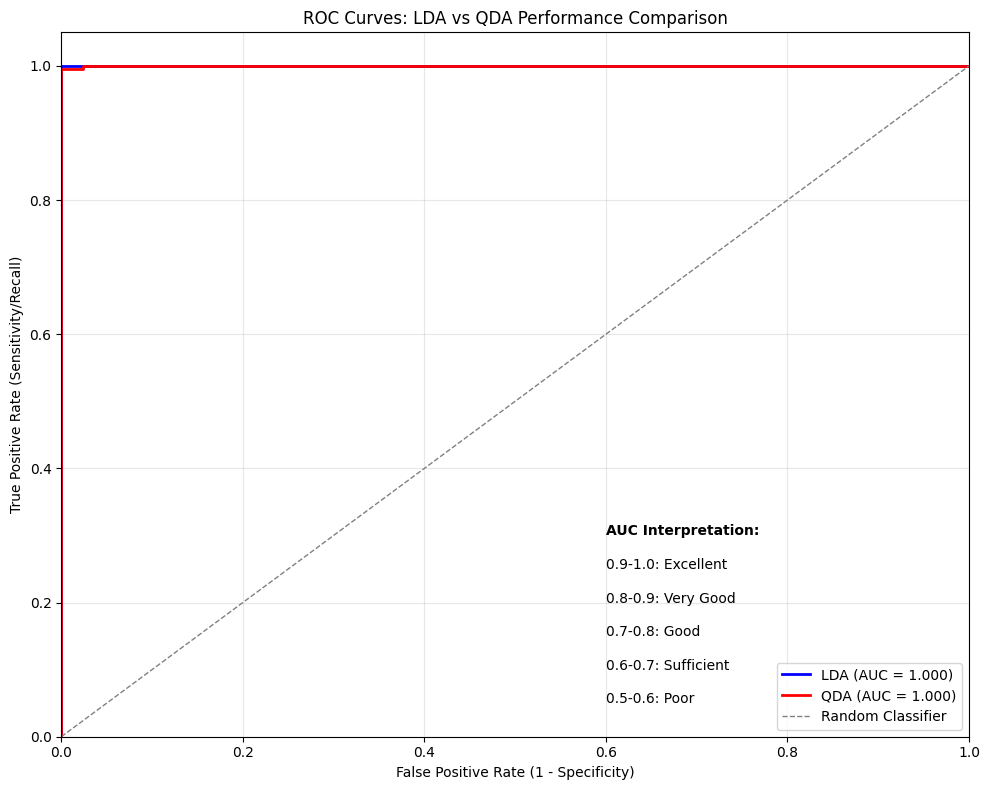

LDA AUC Score: 1.0000
QDA AUC Score: 0.9999
✓ LDA shows better discriminative power (AUC difference: +0.0001)


In [ ]:
plt.figure(figsize=(10, 8))

# Plot both ROC curves
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_proba_lda[:, 1])
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_proba_qda[:, 1])

roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, 
         label=f'LDA (AUC = {roc_auc_lda:.3f})')
plt.plot(fpr_qda, tpr_qda, color='red', lw=2, 
         label=f'QDA (AUC = {roc_auc_qda:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curves: LDA vs QDA Performance Comparison')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Add performance interpretation
plt.text(0.6, 0.3, 'AUC Interpretation:', fontweight='bold')
plt.text(0.6, 0.25, '0.9-1.0: Excellent')
plt.text(0.6, 0.20, '0.8-0.9: Very Good')
plt.text(0.6, 0.15, '0.7-0.8: Good')
plt.text(0.6, 0.10, '0.6-0.7: Sufficient')
plt.text(0.6, 0.05, '0.5-0.6: Poor')

plt.tight_layout()
plt.show()

print(f"LDA AUC Score: {roc_auc_lda:.4f}")
print(f"QDA AUC Score: {roc_auc_qda:.4f}")

# Determine which model has better ROC performance
if roc_auc_qda > roc_auc_lda:
    auc_diff = roc_auc_qda - roc_auc_lda
    print(f"✓ QDA shows better discriminative power (AUC difference: +{auc_diff:.4f})")
elif roc_auc_lda > roc_auc_qda:
    auc_diff = roc_auc_lda - roc_auc_qda
    print(f"✓ LDA shows better discriminative power (AUC difference: +{auc_diff:.4f})")
else:
    print("Both models show identical ROC performance")

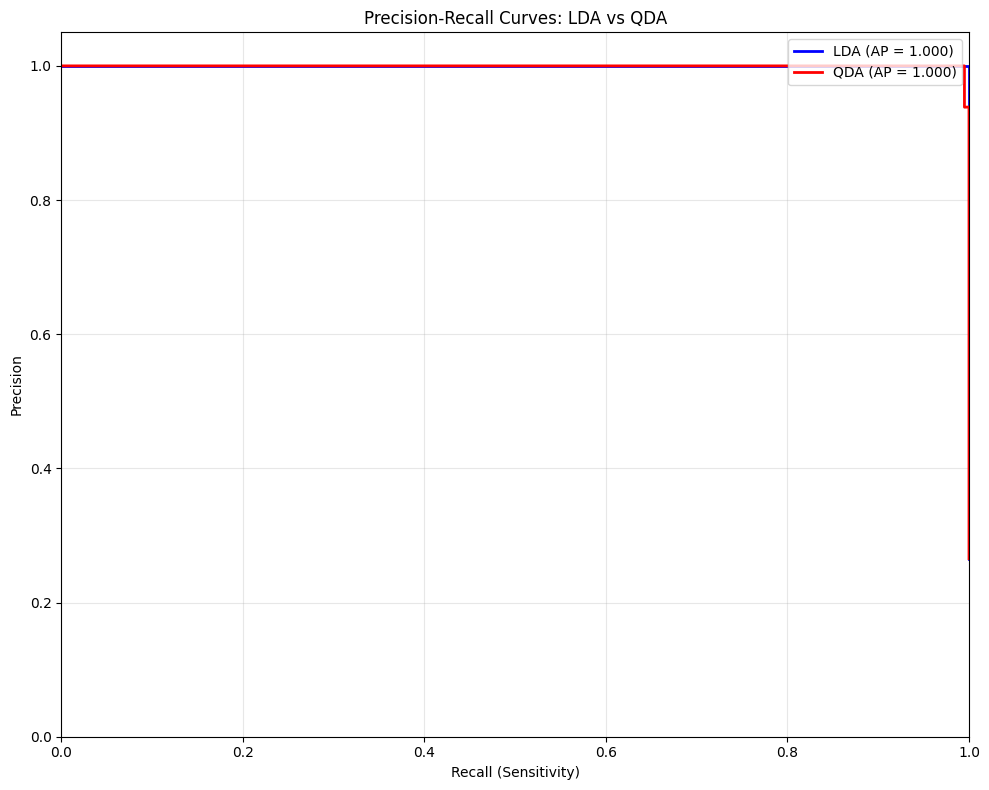

LDA Average Precision: 1.0000
QDA Average Precision: 0.9997


In [179]:
plt.figure(figsize=(10, 8))

# Calculate precision-recall curves
precision_lda, recall_lda, _ = precision_recall_curve(y_test, y_pred_proba_lda[:, 1])
precision_qda, recall_qda, _ = precision_recall_curve(y_test, y_pred_proba_qda[:, 1])

# Calculate average precision scores
from sklearn.metrics import average_precision_score
avg_precision_lda = average_precision_score(y_test, y_pred_proba_lda[:, 1])
avg_precision_qda = average_precision_score(y_test, y_pred_proba_qda[:, 1])

plt.plot(recall_lda, precision_lda, color='blue', lw=2, 
         label=f'LDA (AP = {avg_precision_lda:.3f})')
plt.plot(recall_qda, precision_qda, color='red', lw=2, 
         label=f'QDA (AP = {avg_precision_qda:.3f})')

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves: LDA vs QDA')
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

print(f"LDA Average Precision: {avg_precision_lda:.4f}")
print(f"QDA Average Precision: {avg_precision_qda:.4f}")

PRINCIPALES HALLAZGOS:
🏆 RECOMENDACIÓN GENERAL: LDA

JUSTIFICACIÓN DE NEGOCIO:
La simplicidad y eficiencia de LDA ofrecen el mejor equilibrio

Rendimiento robusto sin riesgos de sobreajuste

Coeficientes más interpretables para los interesados del negocio

DIFERENCIALES DE RENDIMIENTO:
Exactitud (Accuracy): LDA 1.0000 vs QDA 0.9987

F1-Score: LDA 1.0000 vs QDA 0.9975

AUC-ROC: LDA 1.0000 vs QDA 0.9999

MÉTRICAS DE IMPACTO DE NEGOCIO:
Tasa de Falsos Negativos (Riesgo): LDA 0.0000 vs QDA 0.0050

Tasa de Falsos Positivos (Oportunidad): LDA 0.0000 vs QDA 0.0000

CARACTERÍSTICAS DEL MODELO:
LDA: Fronteras lineales, covarianza compartida, más interpretable

QDA: Fronteras cuadráticas, covarianza específica por clase, más flexible

RECOMENDACIÓN PARA LENDSMART:
Implementar LDA para la evaluación de riesgo crediticio

Monitorear el rendimiento del modelo de manera trimestral

Considerar los trade-offs costo-beneficio en la selección de umbrales